## Plot figure 3.a official [done]

In [4]:
import numpy as np
import pandas as pd
import glob

In [5]:
file_path = '/home/cxx579/ssw/reports/lsubject_exp/*csv'

In [6]:
file_list = glob.glob(file_path)

In [7]:
len(file_list)

40

In [8]:
file_list

['/home/cxx579/ssw/reports/lsubject_exp/rowlands_hand_crafted_10_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_90_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_30_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_freeze_10_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_20_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_hand_crafted_40_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_10_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_freeze_50_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_20_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_random_mlp_40_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/capture24_hand_crafted_10_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_10_1.csv',
 '/home/cxx579/ssw/reports/lsubject_exp

In [17]:
master_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    dataset = file_name.split('_')[0]
    
    subject_num = file_name.split('_')[-1]
    subject_num = int(subject_num.split('.')[0])
    model = '_'.join((file_name.split('_')[1:-1]))
    
    current_df = pd.read_csv(file_path)
    if dataset == 'capture24':
        data = [['precision', np.mean(current_df['precision']), np.std(current_df['precision'])],
                 ['recall', np.mean(current_df['recall']), np.std(current_df['recall'])],
                 ['f1', np.mean(current_df['f1']), np.std(current_df['f1'])],
                 ['kappa', np.mean(current_df['kappa']), np.std(current_df['kappa'])]]
        current_df = pd.DataFrame(data, columns=['metric', 'avg', 'std'])
    else:
        continue 
    current_df['dataset'] = dataset
    current_df['model'] = model
    
    current_df['subject_num'] = subject_num  
        
    if len(master_df) == 0:
        master_df = current_df
    else:
        master_df = pd.concat([master_df, current_df])

In [32]:
# get the ones with error bar
master_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    
    dataset = file_name.split('_')[0]
    
    subject_num = file_name.split('_')[-2]
    subject_num = int(subject_num.split('.')[0])
    model = '_'.join((file_name.split('_')[1:-2]))
    
    if dataset != 'rowlands':
        continue

    # epoch_count = file_name.split('_')[-1][:2]
    
    current_df = pd.read_csv(file_path)
    
    current_df['id'] = current_df.index 
    current_df = pd.melt(current_df, id_vars=['id'])
    current_df.drop(['id'], inplace=True, axis=1)

    current_df['dataset'] = dataset
    current_df['model'] = model
    print(file_path, model, subject_num)
    current_df['subject_num'] = subject_num  


  
    if len(master_df) == 0:
        master_df = current_df
    else:
        master_df = pd.concat([master_df, current_df])
master_df = master_df.rename(columns={"variable": "metric"}) 

/home/cxx579/ssw/reports/lsubject_exp/rowlands_hand_crafted_10_1.csv hand_crafted 10
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_30_1.csv flip_net_ft_100k_freeze 30
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_20_1.csv flip_net_ft_100k_freeze 20
/home/cxx579/ssw/reports/lsubject_exp/rowlands_hand_crafted_40_1.csv hand_crafted 40
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_freeze_10_1.csv flip_net_ft_100k_freeze 10
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_20_1.csv flip_net_ft_100k 20
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_random_mlp_40_1.csv flip_net_random_mlp 40
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_ft_100k_10_1.csv flip_net_ft_100k 10
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_random_mlp_10_1.csv flip_net_random_mlp 10
/home/cxx579/ssw/reports/lsubject_exp/rowlands_flip_net_random_mlp_30_1.csv flip_net_random_mlp 30
/home/cxx579/ssw/reports/l

In [28]:
# get the ones with error bar
capture_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    dataset = file_name.split('_')[0]
    
    subject_num = file_name.split('_')[-2]
    subject_num = int(subject_num.split('.')[0])
    model = '_'.join((file_name.split('_')[1:-2]))
    
    if dataset == 'rowlands':
        continue

    # epoch_count = file_name.split('_')[-1][:2]
    
    current_df = pd.read_csv(file_path)
    
    current_df['id'] = current_df.index 
    current_df = pd.melt(current_df, id_vars=['id'])
    current_df.drop(['id'], inplace=True, axis=1)

    current_df['dataset'] = dataset
    current_df['model'] = model
    print(file_path, model, subject_num)
    current_df['subject_num'] = subject_num  


  
    if len(capture_df) == 0:
        capture_df = current_df
    else:
        capture_df = pd.concat([capture_df, current_df])
capture_df = capture_df.rename(columns={"variable": "metric"}) 
#master_df['epoch'] = master_df['epoch'].astype(int)

/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_90_1.csv flip_net_random_mlp 90
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_freeze_10_1.csv flip_net_ft_100k_freeze 10
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_freeze_50_1.csv flip_net_ft_100k_freeze 50
/home/cxx579/ssw/reports/lsubject_exp/capture24_hand_crafted_10_1.csv hand_crafted 10
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_10_1.csv flip_net_random_mlp 10
/home/cxx579/ssw/reports/lsubject_exp/capture24_hand_crafted_30_1.csv hand_crafted 30
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_90_1.csv flip_net_ft_100k 90
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_50_1.csv flip_net_random_mlp 50
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_random_mlp_110_1.csv flip_net_random_mlp 110
/home/cxx579/ssw/reports/lsubject_exp/capture24_flip_net_ft_100k_freeze_70_1.csv flip_net_ft_100k_freeze 70
/home/cx

In [30]:
capture_df.head()

,metric,value,dataset,model,subject_num
0,precision,0.516402,capture24,flip_net_random_mlp,90
1,precision,0.783907,capture24,flip_net_random_mlp,90
2,precision,0.767379,capture24,flip_net_random_mlp,90
3,precision,0.412382,capture24,flip_net_random_mlp,90
4,precision,0.774203,capture24,flip_net_random_mlp,90


In [33]:
master_df.head()

,metric,value,dataset,model,subject_num
0,precision,0.683076,rowlands,hand_crafted,10
1,precision,0.716545,rowlands,hand_crafted,10
2,precision,0.510788,rowlands,hand_crafted,10
3,precision,0.880928,rowlands,hand_crafted,10
4,precision,0.783310,rowlands,hand_crafted,10


In [34]:
np.unique(capture_df.model)

array(['flip_net_ft_100k', 'flip_net_ft_100k_freeze',
       'flip_net_random_mlp', 'hand_crafted'], dtype=object)

In [35]:
np.unique(master_df.model)

array(['flip_net_ft_100k', 'flip_net_ft_100k_freeze',
       'flip_net_random_mlp', 'hand_crafted'], dtype=object)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import matplotlib as mat

In [38]:
capture_df.loc[capture_df['model'] == 'flip_net_ft_100k', 'model']  = 'FT-all'
capture_df.loc[capture_df['model'] == 'flip_net_ft_100k_freeze', 'model'] = 'FT-after-ConV'
capture_df.loc[capture_df['model'] == 'flip_net_random_mlp', 'model'] = 'Fully supervised'
capture_df.loc[capture_df['model'] == 'hand_crafted', 'model'] = 'RF'
master_df.loc[master_df['model'] == 'flip_net_ft_100k', 'model'] = 'FT-all'
master_df.loc[master_df['model'] == 'flip_net_ft_100k_freeze', 'model'] = 'FT-after-ConV'
master_df.loc[master_df['model'] == 'flip_net_random_mlp', 'model'] = 'Fully supervised'
master_df.loc[master_df['model'] == 'hand_crafted', 'model'] = 'RF'

In [39]:
precision_df = master_df[(master_df['metric'] == 'precision')]
recall_df = master_df[master_df['metric'] == 'recall']
f1_df = master_df[master_df['metric'] == 'f1']
kappa_df = master_df[master_df['metric'] == 'kappa']

In [40]:
sns.set_palette('colorblind')

In [41]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8, 5

In [42]:
f1_df.loc[f1_df.model == 'RF', 'model'] = 'Random forest'

/home/cxx579/anaconda3/envs/ssw_env/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


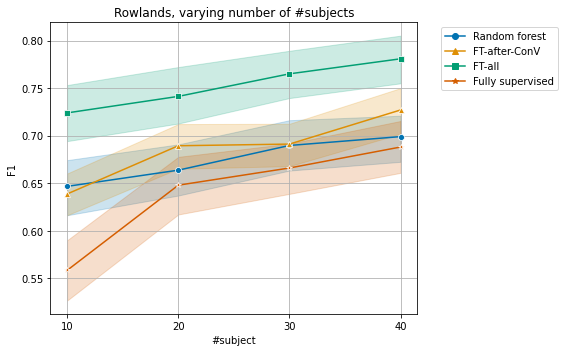

In [43]:
ax = plt.axes()

sns.lineplot(data=f1_df, x='subject_num', y='value',  hue='model', style='model', dashes=False, markers=["o", "^", "s", '*'])

ax.set_title('Rowlands, varying number of #subjects')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set(ylabel='F1')
ax.set(xlabel='#subject')

plt.grid()
ax.set_xticks([10, 20, 30, 40]) 
plt.tight_layout()
plt.savefig('../plots/imgs/rowlands_subject.svg', format='svg', dpi=600)

In [44]:
# Do the same for capture24

In [65]:
import matplotlib

matplotlib.rcParams.update({'font.size': 11})


In [66]:
cap_precision_df = capture_df[(capture_df['metric'] == 'precision')]
cap_recall_df = capture_df[capture_df['metric'] == 'recall']
cap_f1_df = capture_df[capture_df['metric'] == 'f1']
cap_kappa_df = capture_df[capture_df['metric'] == 'kappa']
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter


# figure size in inches
rcParams['figure.figsize'] = 10, 4

In [67]:
cap_f1_df.loc[cap_f1_df.model == 'RF', 'model'] = 'Random forest'

/home/cxx579/anaconda3/envs/ssw_env/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [68]:
#0d0887,#41049d,#6a00a8,#8f0da4,#b12a90,#cc4778,#e16462,#f2844b,#fca636,#fcce25,#f0f921

In [69]:
ibm_platter = ["#0d0887", "#5302a3", "#8b0aa5", "#b83289", "#db5c68", "#f48849", "#febd2a"]
ibm_platter = ["#0d0887",  "#6a00a8", "#b12a90", "#e16462",]


sns.set_palette(sns.color_palette(ibm_platter))

sns.color_palette()




[(0.050980392156862744, 0.03137254901960784, 0.5294117647058824),
 (0.41568627450980394, 0.0, 0.6588235294117647),
 (0.6941176470588235, 0.16470588235294117, 0.5647058823529412),
 (0.8823529411764706, 0.39215686274509803, 0.3843137254901961)]

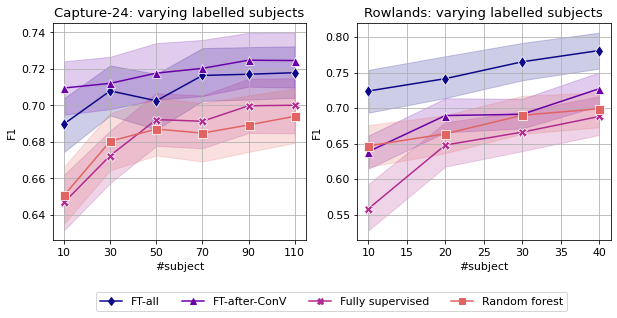

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2)


my_order=['FT-all', 'FT-after-ConV', 'Fully supervised', 'Random forest']


sns.lineplot(data=f1_df, x='subject_num', y='value',  hue='model', ax=ax2,  markersize=9, hue_order=my_order, legend=False,
             style='model', style_order=my_order, dashes=False, markers={
                'FT-all': "d", 'FT-after-ConV': "^", 'Random forest': "s", 'Fully supervised': 'X'})

ax2.set_title('Rowlands: varying labelled subjects')
ax2.set(ylabel='F1')
ax2.set(xlabel='#subject')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax1.grid()
ax1.set_xticks([10, 20, 30, 40]) 
# plt.tight_layout()

my_order=['FT-all', 'FT-after-ConV', 'Fully supervised', 'Random forest']
sns.lineplot(data=cap_f1_df, x='subject_num', y='value',  hue='model', ax=ax1, markersize=9, hue_order=my_order,
             style='model', style_order=my_order, dashes=False, markers={
                'FT-all': "d", 'FT-after-ConV': "^", 'Random forest': "s", 'Fully supervised': 'X'})

ax1.legend(bbox_to_anchor=(1.1, -.35), loc='lower center', ncol=4)
ax1.set_title('Capture-24: varying labelled subjects')
ax1.set(ylabel='F1')
ax2.grid()
ax1.set(xlabel='#subject')
ax1.set_xticks([10, 30, 50, 70, 90, 110]) 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.tight_layout()
plt.savefig('../plots/imgs/varyingDownstreamSubject.pdf', format='pdf', bbox_inches = 'tight', dpi=600)